## Mini-batch를 손쉽게 만들어주는 Dataset과 DataLoader
전체 데이터가 주어졌을 때, 이를 mini-batch들로 나누고, 학습 때마다 mini-batch단위로 제공하는 일을 쉽게 처리해주는 역할 수행
- Dataset: 전체 데이터를 포함하는 container 역할
- DataLoader: Dataset에서 mini-batch 단위로 데이터를 가져오는 역할

### Dataset과 DataLoader를 이용한 digit 구분 예제

### 손글씨 숫자 데이터 분류

In [ ]:
import torch
from torch import nn, optim
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [ ]:
digits = load_digits()

X = digits.data
print(type(X))
print(X.shape)

y = digits.target
print(type(y))
print(y.shape)
print(y)

<class 'numpy.ndarray'>
(1797, 64)
<class 'numpy.ndarray'>
(1797,)
[0 1 2 ... 8 9 8]


### 학습과 테스트 데이터 분류

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

print('Type: x_train, y_train, x_test, y_test')
print(type(x_train), type(y_train), type(x_test), type(y_test))

print('Type: x_train, y_train, x_test, y_test')
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

Type: x_train, y_train, x_test, y_test
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Type: x_train, y_train, x_test, y_test
(1617, 64) (1617,) (180, 64) (180,)


### Tensor로 변환

In [ ]:
x_train = torch.tensor(x_train, dtype=torch.float).to('cuda')
y_train = torch.tensor(y_train, dtype=torch.long).to('cuda')
x_test = torch.tensor(x_test, dtype=torch.float).to('cuda')
y_test = torch.tensor(y_test, dtype=torch.long).to('cuda')

- Dataset과 DataLoader를 구성: 기본 TensorDataset, DataLoader 이용
- Train batch size = 64
- Test batch size = 10,000

### Dataset을 만든다. (비유: 약수물을 정수기 통에 담는다)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

print(train_dataset)
print(test_dataset)

### Dataloader를 만든다. (비유: 정수기 물통애 냉수 파이프와 온수 파이프를 설치한다.)

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=10000, shuffle=True)  # 한번에 시험보려고(있는 만큼) -> 그래서 batch_size를 10000으로 설정

print(train_dataset)
print(test_dataset)

### 학습을 위한 모델, Loss, Optimizer 설정

In [ ]:
net = nn.Linear(64,10)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

### 학습 시작
- net의 parameter 업데이트는 mini-batch마다 수행

In [ ]:
losses = []
net.train()
net.to('cuda')

for epoc in range(200):

  batch_loss = 0.0

  for x_train, y_train in train_dataloader:
    
    optimizer.zero_grad()

    y_pred = net(x_train)
    loss = loss_fn(y_pred, y_train)
    loss.backward()

    optimizer.step()
    batch_loss += loss.item()
  losses.append(batch_loss)
  print(epoc, 'Loss: ', batch_loss)

0 Loss:  0.46635191002860665
1 Loss:  0.4676079759374261
2 Loss:  0.4663966214284301
3 Loss:  0.4548479770310223
4 Loss:  0.4606842864304781
5 Loss:  0.46465410850942135
6 Loss:  0.4536784151569009
7 Loss:  0.4534500348381698
8 Loss:  0.4636003663763404
9 Loss:  0.4443969433195889
10 Loss:  0.46138421120122075
11 Loss:  0.46612182911485434
12 Loss:  0.4721441864967346
13 Loss:  0.4459324600175023
14 Loss:  0.4350476944819093
15 Loss:  0.4316976321861148
16 Loss:  0.4358589353505522
17 Loss:  0.4856923711486161
18 Loss:  0.4484670921228826
19 Loss:  0.4367680959403515
20 Loss:  0.4179342184215784
21 Loss:  0.43268992751836777
22 Loss:  0.42538636503741145
23 Loss:  0.42257563956081867
24 Loss:  0.4704193794168532
25 Loss:  0.4312793263234198
26 Loss:  0.4442404783330858
27 Loss:  0.42282167822122574
28 Loss:  0.42666349303908646
29 Loss:  0.41374709107913077
30 Loss:  0.432695540599525
31 Loss:  0.44111747201532125
32 Loss:  0.4162309840321541
33 Loss:  0.42037049727514386
34 Loss:  0.4

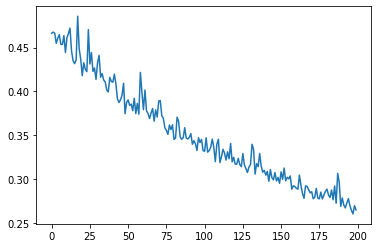

In [ ]:
plt.plot(losses)

### 테스트 시작


In [ ]:
net.eval()

with torch.no_grad():
  for x_test, y_test in test_dataloader:
    test_result = net(x_test)
    pred = torch.argmax(test_result, dim=1)

    num_correct = (pred == y_test).sum().item()
    print('Accuracy: ', num_correct*100.0/len(y_test), '%')

Accuracy:  96.66666666666667 %
